In [12]:
import numpy as np

from numpy.polynomial.polynomial import polyvalfromroots

from matplotlib import pyplot as plt
%matplotlib inline

from tbcontrol.plotting import cross_axis

from ipywidgets import interact, fixed

# Respuesta en frecuencia

La respuesta en frecuencia de un sistema hace referencia a cómo reacciona en estado estacionario ante entradas sinoidales. Analizar dicha respuesta para sistemas en lazo abierto permite determinar estabilidad de los mismos en lazo cerrado. Para analizar la respuesta en frecuencia desde la función de transferencia en el dominio de Laplace se elimina la parte real de la variable $s$.

In [13]:
omega = np.logspace(-2, 2, 1000)
s = omega*1j

In [14]:
tau1 = 4.489
G1 = 0.27 / (tau1*s+1)


## Diagramas de bode

Una gráfica de $|G(j\omega)| \; \text{vs} \; \omega$ junto a un gráfica de $\angle G(j\omega) \; \text{vs} \; \omega$

In [15]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    
    ax_mag.loglog(omega, np.abs(G))
    ax_mag.loglog(omega, np.ones(len(omega)))
    ax_mag.grid(True)
    # ax_phase.semilogx(omega, np.angle(G))
    ax_phase.semilogx(omega, np.unwrap(np.angle(G)))
    ax_phase.semilogx(omega, -3.14*np.ones(len(omega)))
    ax_phase.grid(True)
    
def Kbode(k,G):
    bode(k*G)  

Diagrama de Bode del sistema G1

In [17]:
interact(Kbode,k=(0.0,50.0),G=fixed(G1))

interactive(children=(FloatSlider(value=25.0, description='k', max=50.0), Output()), _dom_classes=('widget-int…

<function __main__.Kbode(k, G)>

Observe que el sistema no alcanza a tener desfase de $\pi$, esto indica que el sistema en lazo cerrado será estable.

## Nyquist

Una gráfica de $\Re \{G(j\omega)\} \; \text{vs} \; \Im \{G(j\omega)\}$. Es común graficar el comportamiento para frecuencias negativas.

In [18]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.plot([0.0,-1.0],[0.0,0.0],'k')
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')
    plt.grid(True)
    
def Knyquist(k,G):
    nyquist(k*G)

Diagrama de Nyquist del sistema G1

In [21]:
interact(Knyquist,k=(0.0,100.0),G=fixed(G1))

interactive(children=(FloatSlider(value=50.0, description='k'), Output()), _dom_classes=('widget-interact',))

<function __main__.Knyquist(k, G)>

Observe que el sistema no alcanza a tener desfase de $\pi$, esto indica que el sistema en lazo cerrado será estable.

Para cualquier ganancia mi sistema sigue siendo estable 

In [23]:
import control

In [24]:
G1C = control.tf(0.27, [tau1, 1])

Diagrama de Bode del sistema G1

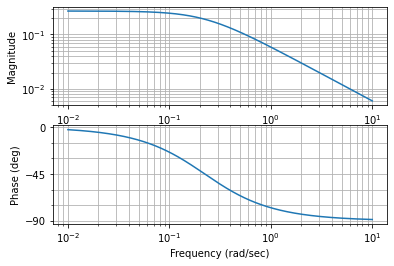

In [25]:
control.bode(G1C);

Diagrama de Nyquist del sistema G1

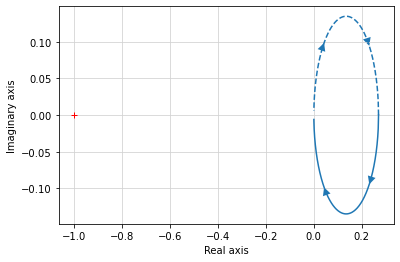

In [26]:
control.nyquist_plot(G1C);

EL sistema es estable ya que en la grafica se ve que el punto -1 esta fuera del área, las flechas indican hacia donde crece la frecuencia en este caso es hacia la derecha. 

# Observación 

Con esta practica de respuesta en frecuencia se puede determinar estabilidad en el sistema en lazo cerrado, podemos entender en que regiones debemos operar el proceso y nos muestra en que otras regiones debemos trabajar para evitar dinámicas no deseadas.